# 載入所需套件

In [1]:
import requests
from datetime import datetime
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

style.use('seaborn')
%matplotlib inline

# 定義抓取香港交易所個股當天價量資料函數

In [2]:
def HKEX_price_crawler(stock_code):
    token_url='https://www.hkex.com.hk/Market-Data/Securities-Prices/Equities/Equities-Quote?sym=700&sc_lang=zh-hk'
    response=requests.get(token_url)
    #非貪婪模式:(.+?)
    token=re.findall(r'LabCI.getToken = function \(\) { (.+?); };',' '.join(response.text.split()))[0].split('return ')[-1].replace('"','')
    unix_time=int(datetime.now().timestamp())
    url='https://www1.hkex.com.hk/hkexwidget/data/getchartdata2?hchart=1&span=0&int=0&ric={}&token={}&qid={}&callback=jQuery_{}'.format(stock_code,token,unix_time,unix_time)
    response=requests.get(url)
    columns=['Datetime','Open','High','Low','Close','Volume','Value']
    df=pd.DataFrame(json.loads(re.findall(r'jQuery_\d+\((.+)\)',response.text)[0])['data']['datalist'],columns=columns)
    df['Datetime']=df['Datetime'].apply(lambda x:datetime.utcfromtimestamp(x/1000+28800))
    df.set_index(['Datetime'],inplace=True)
    
    return df

# 定義繪製當天個股價量資料函數

In [3]:
def plot_price_volume(stock_code,df):
    fig,ax=plt.subplots(1,figsize=(15,8))
    ax2=ax.twinx()
    ax.plot(df.index,df.Close,color='r')
    ax2.bar(df.index,df.Volume,width=1/(5*len(df.index)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    ax.set_xlabel(None)
    ax.figure.autofmt_xdate(rotation=0,ha='center')
    ax.set_ylabel('Price',fontsize=20)
    ax.set_title('{} Price Volume Plot'.format(stock_code),fontsize=22)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax2.tick_params(axis='y',labelsize=18)
    ax2.set_ylabel('Volume',fontsize=20,rotation=270,labelpad=15)
    plt.show()

# 抓取指定香港交易所個股當天價量資料

In [4]:
stock_code='0700.HK'
df=HKEX_price_crawler(stock_code)
df

,Open,High,Low,Close,Volume,Value
Datetime,,,,,,
2021-06-25 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-25 09:30:00,588.5,588.5,585.5,586.00,250700.0,1.472503e+11
2021-06-25 09:31:00,585.5,588.5,584.0,585.00,80500.0,4.710872e+10
2021-06-25 09:32:00,585.5,586.5,585.0,586.50,70600.0,4.136005e+10
2021-06-25 09:33:00,586.5,586.5,585.5,586.25,39300.0,2.303405e+10
...,...,...,...,...,...,...
2021-06-25 16:05:00,599.0,599.0,599.0,599.00,0.0,0.000000e+00
2021-06-25 16:06:00,599.0,599.0,599.0,599.00,0.0,0.000000e+00
2021-06-25 16:07:00,599.0,599.0,599.0,599.00,0.0,0.000000e+00


# 繪製價量資料圖

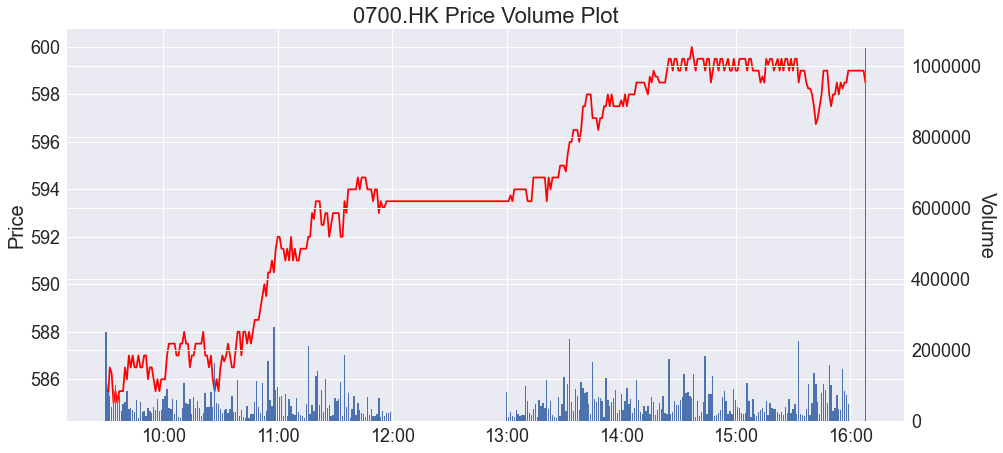

In [5]:
plot_price_volume(stock_code,df)